In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import npts

DATA_DIR = 'data/'

## Download SFO weather data 

In [3]:
# import urllib.request

# for year in range(1987, 2019):
#     print(f"Downloading data for year {year}")
#     urllib.request.urlretrieve(f"https://www.ncei.noaa.gov/data/global-hourly/access/{year}/72494023234.csv", 
#                                DATA_DIR + f"{year}-SFO-weather.csv")

In [42]:
def load_year(year):
    ## Look at the document in DATA_DIR for spec.
    data=pd.read_csv(DATA_DIR+f'{year}-SFO-weather.csv.gz', usecols=[1,13])
    data.index = pd.to_datetime(data.DATE, format='%Y-%m-%dT%H:%M:%S')
    data = data.dropna()
    data['temp'] = data.TMP.apply(lambda el: float(el.split(',')[0])/10.)
    data['qual_code'] = data.TMP.apply(lambda el: int(el.split(',')[1]))
        
    # time zone
    import pytz
    pacific = pytz.timezone('US/Pacific')
    data.index = data.index.tz_localize(pytz.utc).tz_convert(pacific)

    return data.temp[data.qual_code.isin([1,5])]

In [49]:
data = pd.Series()
for year in range(1987, 1993):
    data = data.append(load_year(year))

In [ ]:
baseline = npts.Baseline(npts.HourOfDay(lambdas=[10]), npts.DayOfYear(lambdas=[10]))
baseline.fit(data)

Building baseline with 8784 = 24*366 values.
Fitting on 52636 observations.
Selecting 80-19 train and test sets.
[[10], [10]]
working with lambda (10, 10)
solving with u=[2.30258509 2.30258509], so λ=(10, 10)


In [ ]:
plt.plot(baseline.theta)

fig = plt.figure()
cax = plt.imshow(baseline.theta.reshape((366,24)).T, aspect='auto',origin='lower')
axc = fig.colorbar(cax, ax=fig.gca(), shrink=.7)

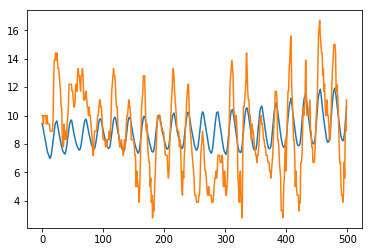

In [33]:
plt.plot(baseline.theta[:500])
plt.plot(data.values[:500])


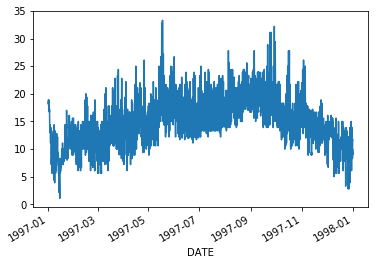

In [45]:
data.temp[data.qual_code.isin([1,5])].plot()

In [4]:
baseline = npts.NonParametricModel(npts.HourOfDay(), npts.DayOfYear())
baseline.fit(data['HLY-TEMP-NORMAL'])

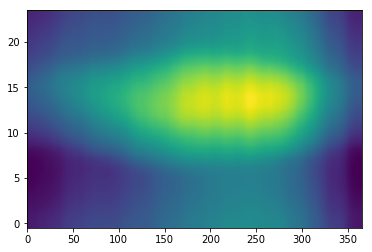

In [11]:
plt.imshow(baseline.theta.reshape((366,24)).T, aspect='auto', 
           origin='lower', interpolation='gaussian',)

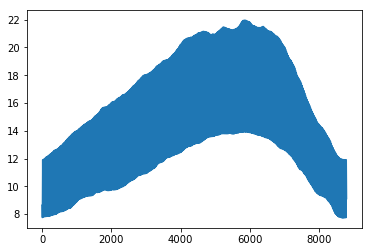

In [5]:
plt.plot(baseline.theta)

## Load data 

In [3]:
data = pd.read_csv('sesameRetLocalCurr.csv', index_col=0, parse_dates=['DATE'])
data.head()

,LEVERAGE,MOMENTUM,VALUE,GROWTH,FMOM2_SMOOTHED,SIZE,VOLATIL,ROE,UDREPS_40_SMOOTHED,UTE_SMOOTHED
DATE,,,,,,,,,,
1997-03-04,0.000228,0.001888,0.000086,0.000793,-0.000384,0.000639,0.003059,NaN,NaN,NaN
1997-03-05,-0.000338,0.001193,0.000845,0.000685,-0.001241,0.000533,-0.000269,NaN,NaN,NaN
1997-03-06,0.000257,0.001730,-0.000002,-0.000077,-0.000061,-0.000198,-0.000921,NaN,NaN,NaN
1997-03-07,0.001064,-0.000111,-0.000463,-0.000507,-0.000033,0.000918,0.001157,NaN,NaN,NaN
1997-03-10,0.000440,0.001022,0.000472,-0.000714,-0.000057,0.000724,-0.001723,NaN,NaN,NaN


In [4]:
import itertools

data_used = data.iloc[:,:4]

covariance = data_used**2
covariance.columns = [el + '^2' for el in data_used.columns]

for colname in itertools.combinations(data_used.columns, 2):
    covariance[colname] = np.sqrt(2) * data_used[colname[0]] * data_used[colname[1]]

In [5]:
covariance

,LEVERAGE^2,MOMENTUM^2,VALUE^2,GROWTH^2,"(LEVERAGE, MOMENTUM)","(LEVERAGE, VALUE)","(LEVERAGE, GROWTH)","(MOMENTUM, VALUE)","(MOMENTUM, GROWTH)","(VALUE, GROWTH)"
DATE,,,,,,,,,,
1997-03-04,5.181710e-08,3.563562e-06,7.367587e-09,6.296088e-07,6.077063e-07,2.763212e-08,2.554388e-07,2.291500e-07,2.118325e-06,9.631923e-08
1997-03-05,1.141605e-07,1.423173e-06,7.147140e-07,4.689850e-07,-5.700353e-07,-4.039607e-07,-3.272295e-07,1.426297e-06,1.155376e-06,8.187676e-07
1997-03-06,6.593884e-08,2.992402e-06,4.175945e-12,5.998757e-09,6.281966e-07,-7.421011e-10,-2.812654e-08,-4.999221e-09,-1.894766e-07,2.238324e-10
1997-03-07,1.131145e-06,1.222400e-08,2.146951e-07,2.565678e-07,-1.662956e-07,-6.969236e-07,-7.618600e-07,7.244905e-08,7.919955e-08,3.319152e-07
1997-03-10,1.937299e-07,1.044249e-06,2.230803e-07,5.094004e-07,6.360853e-07,2.939977e-07,-4.442659e-07,6.825707e-07,-1.031446e-06,-4.767331e-07
1997-03-11,2.006206e-08,1.915150e-09,4.703008e-09,1.751421e-07,-8.766055e-09,-1.373696e-08,-8.382972e-08,4.244282e-09,2.590071e-08,4.058804e-08
1997-03-12,9.186276e-08,8.572288e-07,6.402717e-08,4.754938e-08,-3.968561e-07,-1.084593e-07,9.346676e-08,3.313184e-07,-2.855195e-07,-7.803143e-08
1997-03-13,1.650032e-09,5.204384e-08,1.478028e-07,1.026744e-07,1.310527e-08,-2.208526e-08,1.840740e-08,-1.240341e-07,1.033786e-07,-1.742158e-07
1997-03-14,1.321750e-07,1.385284e-07,2.003426e-07,1.386782e-07,1.913635e-07,2.301316e-07,-1.914669e-07,2.355978e-07,-1.960147e-07,-2.357251e-07


In [4]:
pd.DataFrame({'mean (bp)':data.mean()*1E4, 'std (bp)':data.std()*1E4}).T

,LEVERAGE,MOMENTUM,VALUE,GROWTH,FMOM2_SMOOTHED,SIZE,VOLATIL,ROE,UDREPS_40_SMOOTHED,UTE_SMOOTHED
mean (bp),-0.271325,0.546352,0.660557,0.122584,0.336958,-0.454625,0.025918,-0.419979,0.409924,0.591058
std (bp),6.820603,20.208227,11.589189,7.672755,4.531196,12.621879,38.619978,18.622846,6.652602,6.648901


## Split into train - test 

In [6]:
mask = np.random.uniform(size=len(covariance)) < .9
train = covariance[mask] #data.iloc[:-366]
test = covariance[~mask] #data.iloc[-366:]

### Plotting functions

In [6]:
def plot_RMSE(cost_dict, title):
    fig = plt.figure(figsize=(8,4))
    cax = plt.hexbin(*np.array([[*np.log(k), np.sqrt(v)] for k, v 
                          in cost_dict.items()]).T,
              gridsize=10)
    axc = fig.colorbar(cax, ax=fig.gca(), shrink=.7)
    plt.plot(*np.log(baseline.best_lambda), 'ro', markersize=10)
    plt.xlabel('log(λ_week)')
    plt.ylabel('log(λ_quart)')
    plt.title(title)
    
def plot_baseline(baseline):
    fig = plt.figure(figsize=(8,4))
    avg = np.mean(baseline.theta)
    cax = plt.imshow((baseline.theta - avg).reshape(262,5).T, 
                     origin='lower', aspect='auto')
    axc = fig.colorbar(cax, ax=fig.gca(), shrink=.7)
    plt.title(f'De-meaned baseline; mean = {avg:.3f}')
    plt.xlabel('Day of quarter')
    plt.ylabel('Day of week')
    
    
def plot_seasonal(seasonal):
    plt.figure()
    avg = seasonal.theta.mean()
    plt.plot(seasonal.theta - avg)
    plt.title(f'De-meaned seasonal; mean = {avg:.3f}')
    plt.xlabel('Day of period')

### Analysis functions 

In [7]:
def RMSE(data, predictor):
    return np.sqrt(((predictor(data.index) - data)**2).mean())

def fit_and_compare_all(train_series, test_series):

    baseline = npts.NonParametricModel(npts.DayOfWorkWeek(),#lambdas=[None,.1,.5,1.,5.,1E1,1E2,1E3]), 
                                        npts.BDayOfYear())#lambdas=[None,1E1,50, 1E2,500, 1E3,1E4]))
    baseline.fit(train_series, method='train-test')
    
    mean = np.mean(train_series)

    weekly_seasonal = npts.NonParametricModel(npts.DayOfWorkWeek(lambdas=[0.]))
    weekly_seasonal.fit(train_series, train_frac=1., method='train-test')

    quarterly_seasonal = npts.NonParametricModel(npts.BDayOfQuarter(lambdas=[0.]))
    quarterly_seasonal.fit(train_series, train_frac=1., method='train-test')
    
    df = pd.DataFrame(index=['train RMSE', 'test RMSE'], 
                      columns=['baseline', 'weekly_seas', 'quarterly_seas'])
    for i, data in enumerate((train_series, test_series)):
        for j, indexer in enumerate((baseline, weekly_seasonal, quarterly_seasonal)):
            df.iloc[i,j] = RMSE(data, indexer.predict)
            
    df.loc['train RMSE', 'mean'] = np.sqrt(((mean - train_series)**2).mean())
    df.loc['test RMSE', 'mean'] = np.sqrt(((mean - test_series)**2).mean())

    return baseline, mean, weekly_seasonal, quarterly_seasonal, df

# Analysis: RMSEs of all models

In [8]:
big_df = pd.DataFrame()

In [9]:
for colname in data.columns:
    train_series = train[colname]*1E4
    test_series = test[colname]*1E4

    baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
        fit_and_compare_all(train_series, test_series)

    big_df = big_df.append(df.set_index([["$\\text{%s}$ ($b.p.$)"%colname]*2, df.index]))

    train_series = (train[colname]*1E4)**2
    test_series = (test[colname]*1E4)**2

    baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
        fit_and_compare_all(train_series, test_series)

    big_df = big_df.append(df.set_index([['$\\text{%s}^2$ ($b.p.^2$)'%colname]*2, df.index]))

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


## Compare all RMSES 

Rows are highlighted. Each yellow cell is the model that achieves the lowest train RMSE. Blue, the one that achieves the lowest test RMSE. We see than, most often, the baseline has the best test RMSE.

In [10]:
def highlight_min_train_test(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_min = s == s.min()
    if s.name[1] == 'test RMSE':
        return ['background-color: cyan' if v else '' for v in is_min]
    else:
        return ['background-color: yellow' if v else '' for v in is_min]
    
big_df.style.apply(highlight_min_train_test, 1)

# Plot of selected models 

For a selection of models, we plot the RMSEs of the iterates (for the search in the space of regularizing λ), and
the resulting baseline models. We also plot the weekly and quarterly seasonal means.

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,6.80217,6.82559,6.78333,6.831164
test RMSE,6.65378,6.71833,6.77543,6.719576


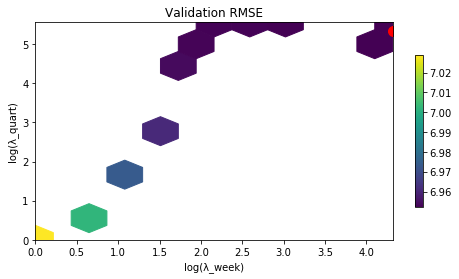

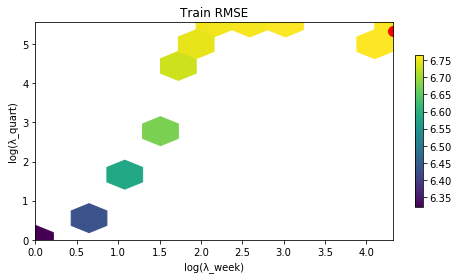

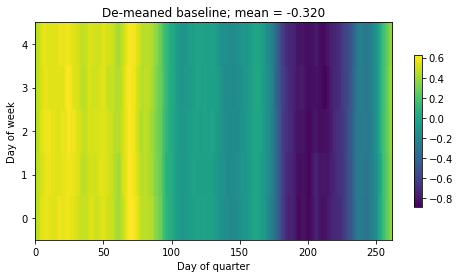

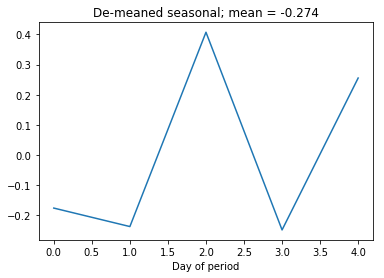

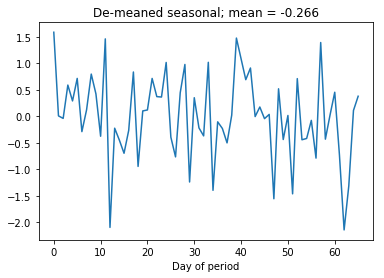

In [11]:
## LEVERAGE, non-square

train_series = train.LEVERAGE*1E4
test_series = test.LEVERAGE*1E4

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,19.801,20.1467,19.9528,20.163512
test RMSE,20.5744,20.5674,20.6148,20.584366


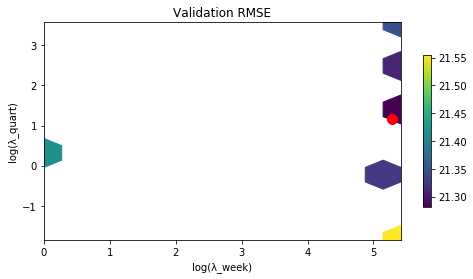

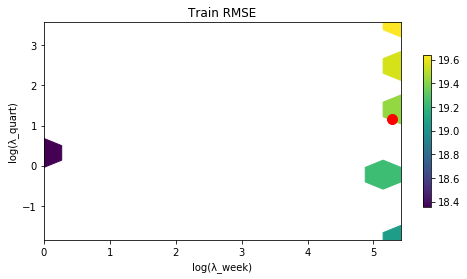

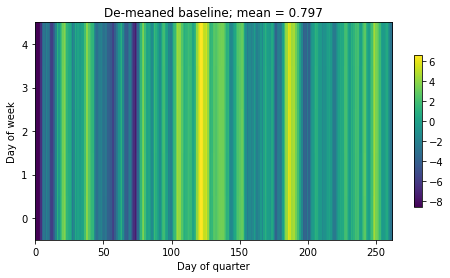

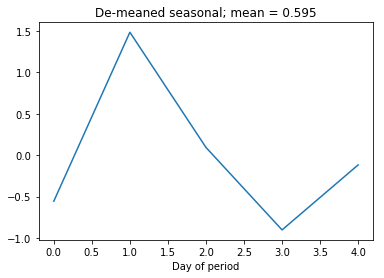

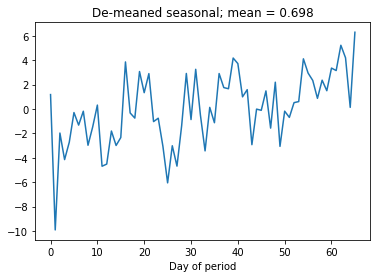

In [12]:
## MOMENTUM, non-square

train_series = train.MOMENTUM*1E4
test_series = test.MOMENTUM*1E4

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,11.5918,11.6041,11.5054,11.610540
test RMSE,11.3925,11.4043,11.3672,11.386642


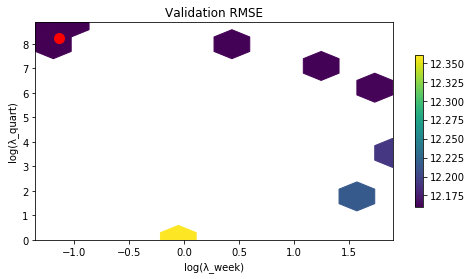

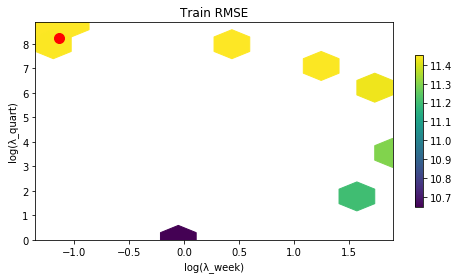

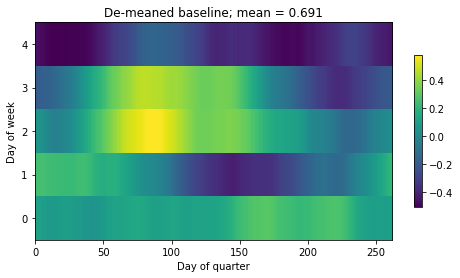

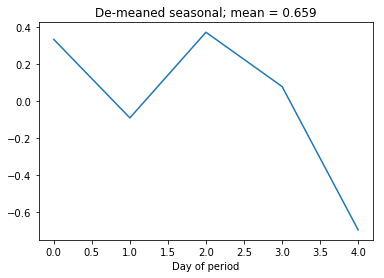

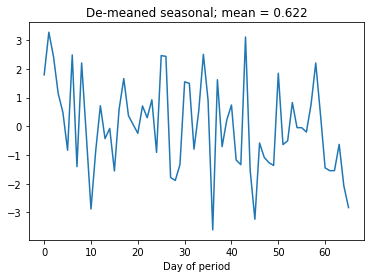

In [13]:
## VALUE, non-square

train_series = train.VALUE*1E4
test_series = test.VALUE*1E4

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,7.65842,7.69483,7.64088,7.703600
test RMSE,7.37818,7.39039,7.40745,7.385444


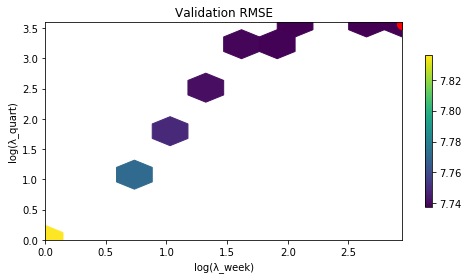

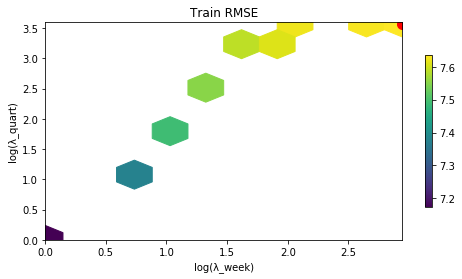

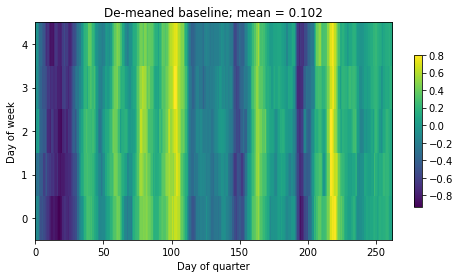

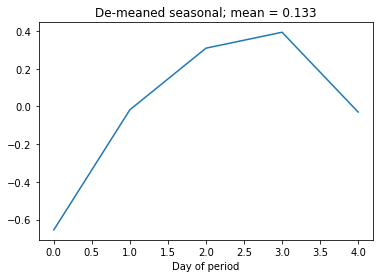

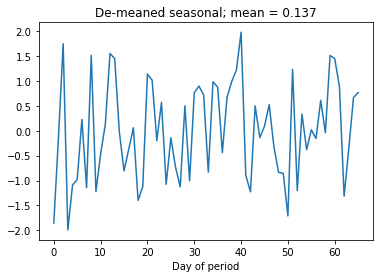

In [14]:
## GROWTH, non-square

train_series = train.GROWTH*1E4
test_series = test.GROWTH*1E4

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,4.53782,4.53795,4.51271,4.540963
test RMSE,4.44248,4.43835,4.47384,4.439309


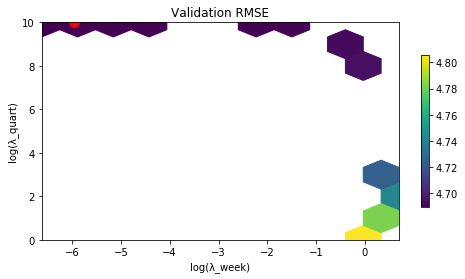

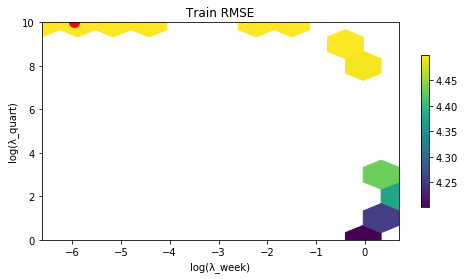

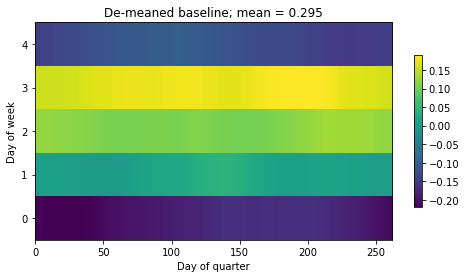

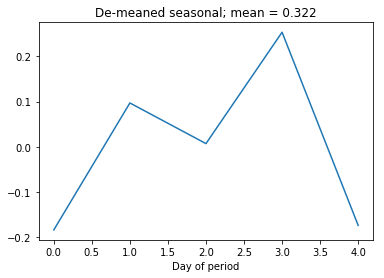

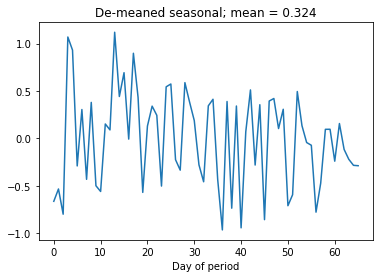

In [15]:
## FMOM2_SMOOTHED, non-square

train_series = train.FMOM2_SMOOTHED*1E4
test_series = test.FMOM2_SMOOTHED*1E4

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,12.5813,12.6427,12.5068,12.693272
test RMSE,11.9684,11.9759,12.1023,11.957892


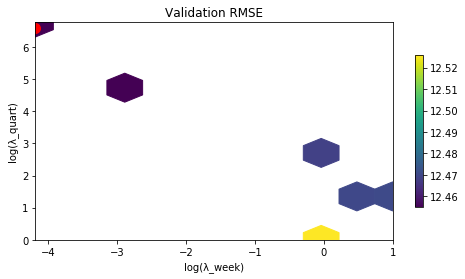

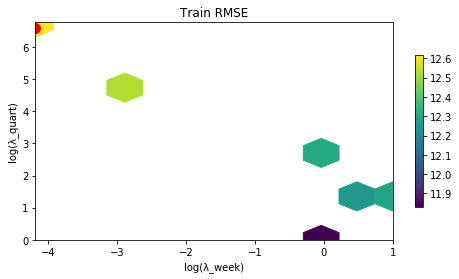

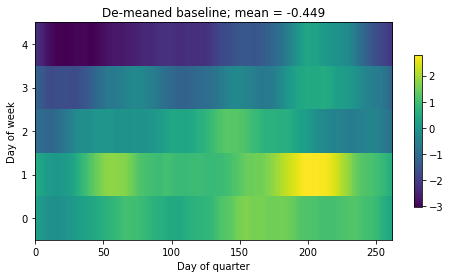

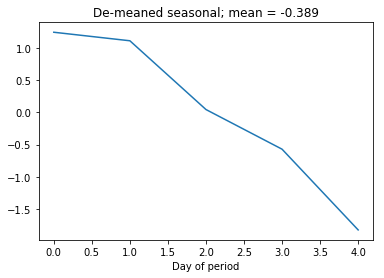

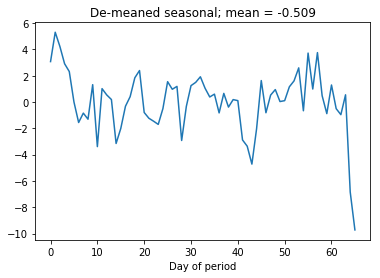

In [16]:
## SIZE, non-square

train_series = train.SIZE*1E4
test_series = test.SIZE*1E4

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,38.7575,38.7585,38.4635,38.800358
test RMSE,36.8659,36.9111,37.3031,36.947519


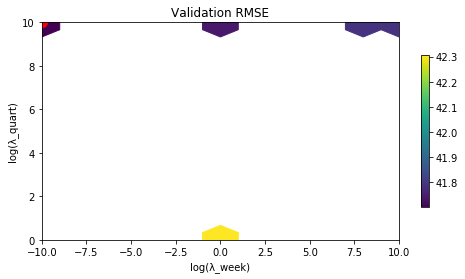

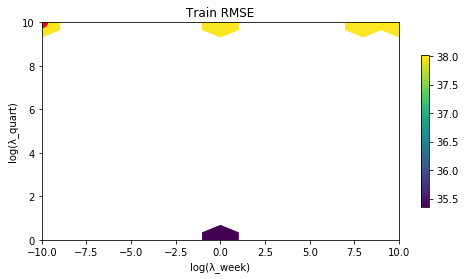

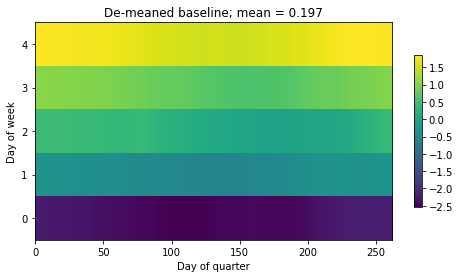

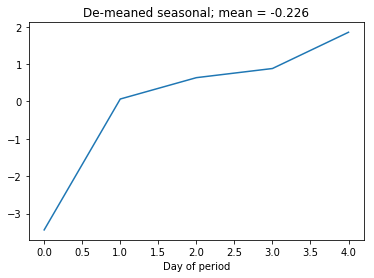

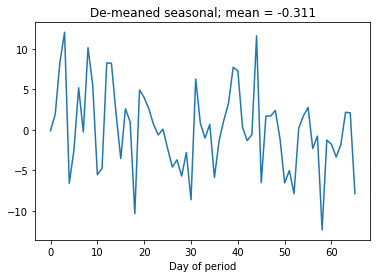

In [17]:
## VOLATIL, non-square

train_series = train.VOLATIL*1E4
test_series = test.VOLATIL*1E4

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,18.5193,18.5099,18.4004,18.519920
test RMSE,19.4825,19.4898,19.7612,19.479969


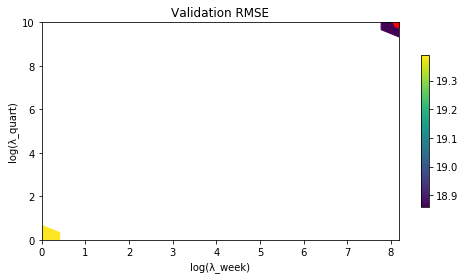

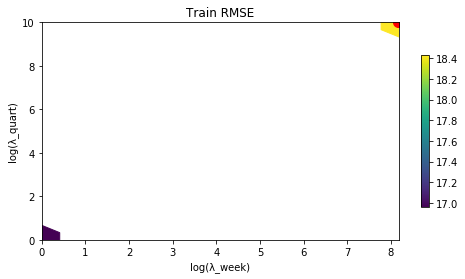

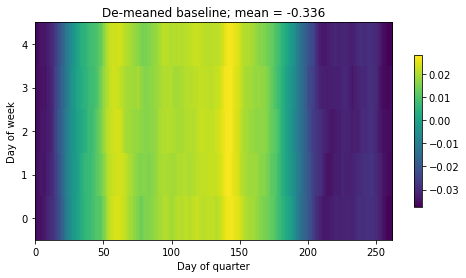

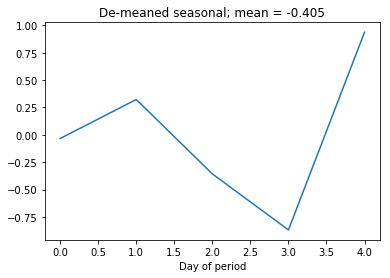

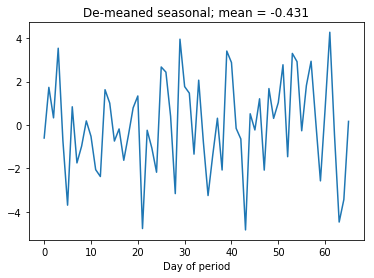

In [18]:
## ROE, non-square

train_series = train.ROE*1E4
test_series = test.ROE*1E4

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,6.43231,6.6196,6.55356,6.624956
test RMSE,6.94514,6.87809,6.87713,6.884007


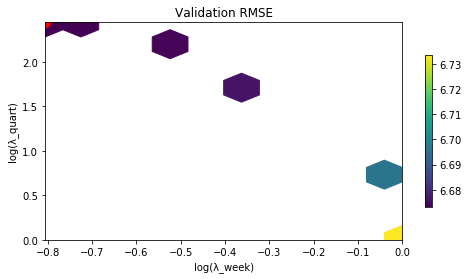

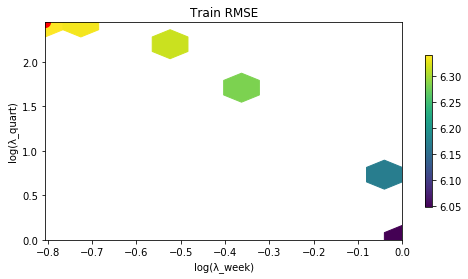

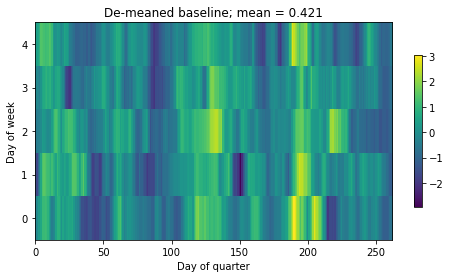

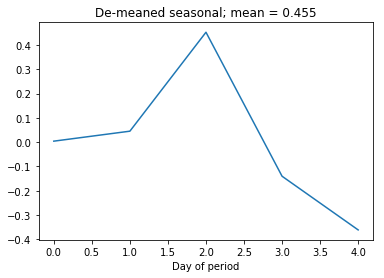

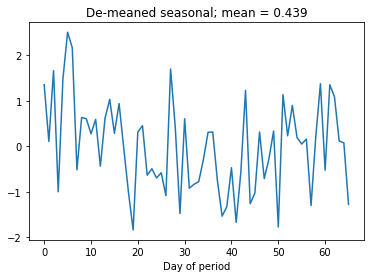

In [19]:
## UDREPS_40_SMOOTHED, non-square

train_series = train.UDREPS_40_SMOOTHED*1E4
test_series = test.UDREPS_40_SMOOTHED*1E4

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,6.55499,6.54949,6.39768,6.564505
test RMSE,7.35515,7.37569,7.51408,7.354047


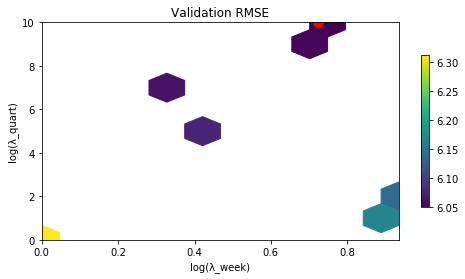

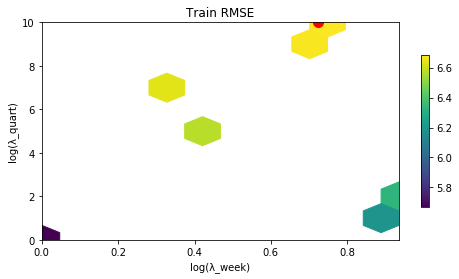

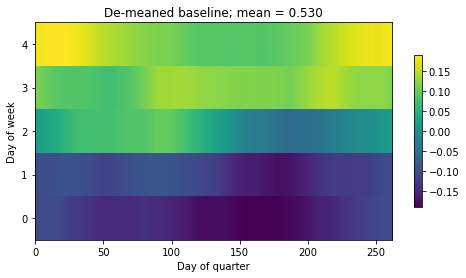

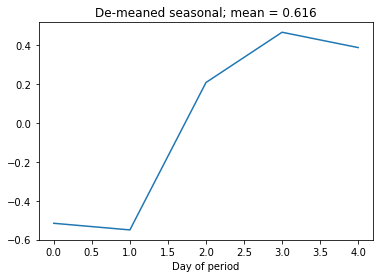

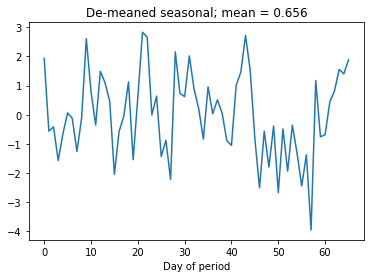

In [20]:
## UTE_SMOOTHED, non-square

train_series = train.UTE_SMOOTHED*1E4
test_series = test.UTE_SMOOTHED*1E4

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,968.962,978.703,969.769,979.438993
test RMSE,1085.9,1085.75,1091.69,1087.331051


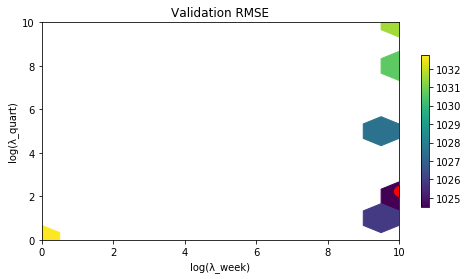

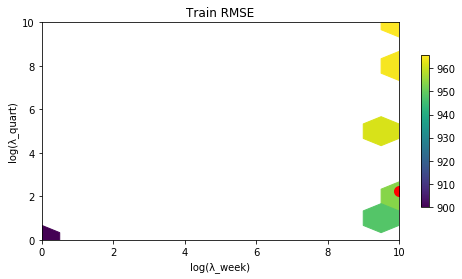

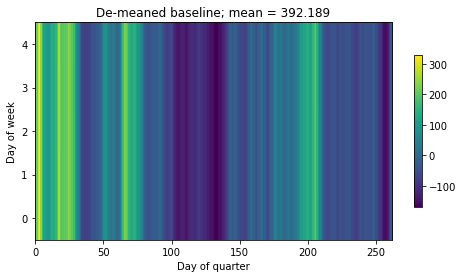

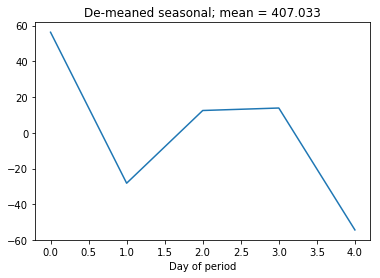

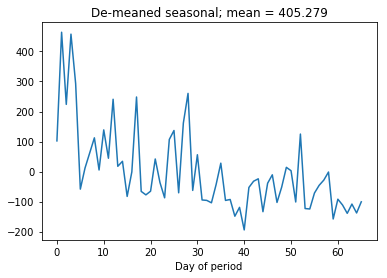

In [21]:
## MOMENTUM, squared
train_series = (train.MOMENTUM*1E4)**2
test_series = (test.MOMENTUM*1E4)**2

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,377.436,377.501,375.202,377.538469
test RMSE,306.651,306.447,312.351,306.716354


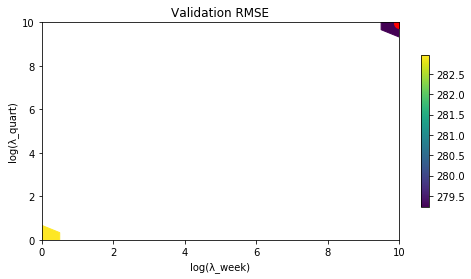

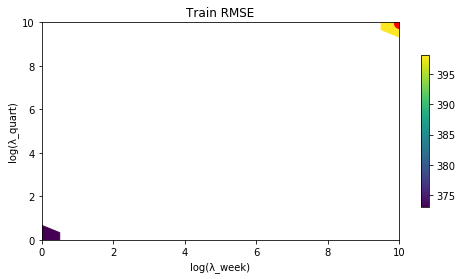

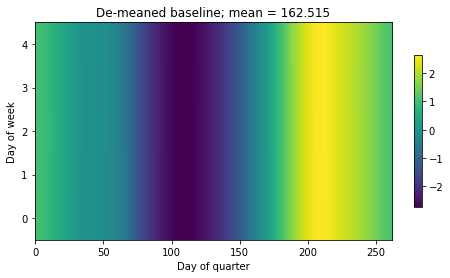

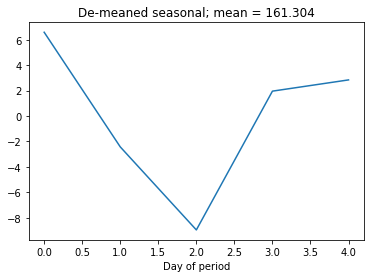

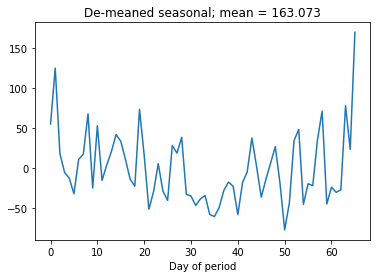

In [22]:
## SIZE, squared

train_series = (train.SIZE*1E4)**2
test_series = (test.SIZE*1E4)**2

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df